In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [9]:
### discretization
strike_l = 0.01
strike_u = 0.05
disc = 1e-4
strikes = np.arange(strike_l, strike_u + 1e-8, disc)

/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


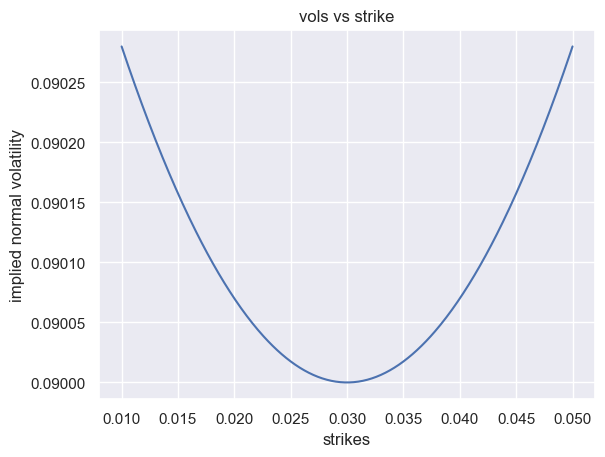

In [17]:
### market normal implied vol $\sigma^0_N$
def implied_vol_normal(forward : float, strikes : float|np.ndarray, base : float, slope : float):
    return base + slope * (strikes - forward) ** 2

forward = 0.03
base = 0.090
slope = 0.7
implied_vols = implied_vol_normal(forward, strikes, base, slope)

# plot
sns.lineplot(x=strikes, y=implied_vols)
plt.xlabel('strikes')
plt.ylabel('implied normal volatility')
plt.title("vols vs strike")
plt.show()

/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


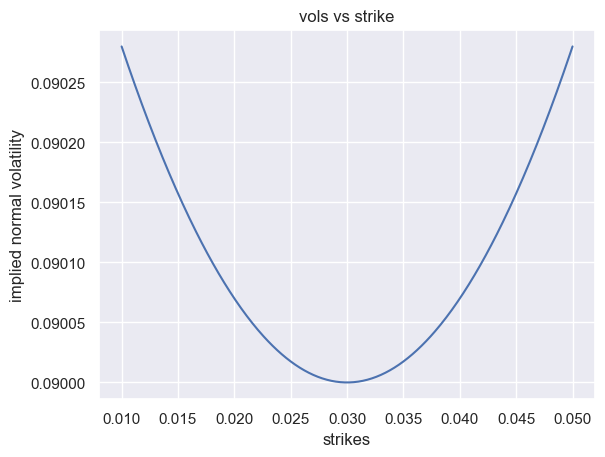

In [20]:
### new smile in terms of old smile
def implied_vol_normal_new(new_forward : float, old_forward : float, strikes : float|np.ndarray, base : float, slope : float):
    shifted_strikes = new_forward + strikes - old_forward
    return implied_vol_normal(old_forward, shifted_strikes, base, slope)

new_forward = forward + 1e-3
new_implied_vols = implied_vol_normal_new(new_forward, forward, strikes, base, slope)

# plot
sns.lineplot(x=strikes, y=implied_vols)
plt.xlabel('strikes')
plt.ylabel('implied normal volatility')
plt.title("vols vs strike")
plt.show()

/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lunli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

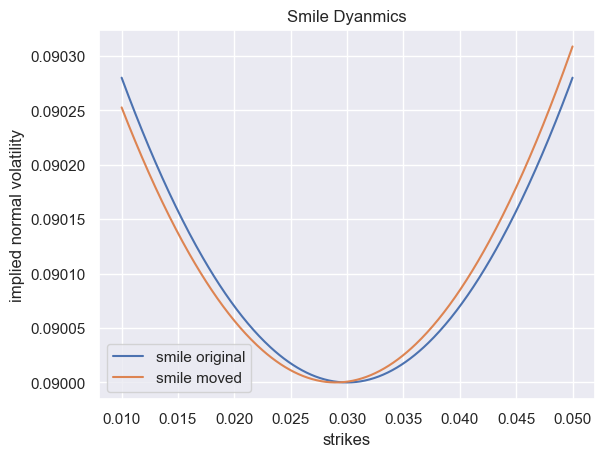

In [21]:
### combined


sns.lineplot(x=strikes, y=implied_vols, label="smile original")
sns.lineplot(x=strikes, y=new_implied_vols, label="smile moved")

plt.xlabel('strikes')
plt.ylabel('implied normal volatility')
plt.title("Smile Dyanmics")
plt.legend()
plt.show()